In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import joblib

In [2]:
X = pd.read_csv("../data/processed/train_data.csv")

#### Initialize the Model

In [3]:
n_estimators = 100
contamination = 0.05
random_state = 42

In [13]:
model = IsolationForest(n_estimators = 100, contamination = 0.1, random_state = 42)
model.fit(X)

,n_estimators,100
,max_samples,'auto'
,contamination,0.1
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


#### Predict
The model gives us: 
1  = Normal
-1  = Anomaly (Fraud)

In [14]:
predictions = model.predict(X)
unique, counts = np.unique(predictions, return_counts = True)
print("Prediction Breakdown")
print(dict(zip(unique, counts)))

Prediction Breakdown
{np.int64(-1): np.int64(50000), np.int64(1): np.int64(450000)}


In [15]:
df_full = pd.read_csv('../data/processed/full_data.csv')
df_full["model_predictions"] = predictions


In [16]:
# Convert -1/1 to "Fraud"/"Normal" for easier reading
# map: -1 -> True (Fraud), 1 -> False (Normal)
df_full['predicted_is_fraud'] = df_full['model_predictions'].map({-1: True, 1: False})

In [17]:
caught_fraud = df_full[(df_full['predicted_is_fraud'] == True) & (df_full['is_fraud'] == True)]
print(f"\n The Model Caught {len(caught_fraud)} confirmed fraudsters!")


 The Model Caught 1793 confirmed fraudsters!


#### Visualise The Results

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


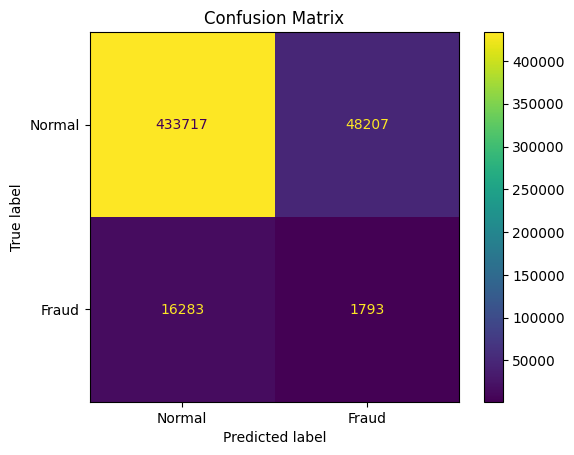

In [19]:
cm = confusion_matrix(df_full['is_fraud'], df_full['predicted_is_fraud'])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Normal", "Fraud"])
disp.plot(cmap = 'viridis')
plt.title('Confusion Matrix')
plt.show()

In [20]:
cm

array([[433717,  48207],
       [ 16283,   1793]])

In [21]:
cm_percent = cm.astype('float') / cm.sum() * 100
cm_percent

array([[86.7434,  9.6414],
       [ 3.2566,  0.3586]])

In [22]:
joblib.dump(model, '../models/isolation_forest_model.pkl')

['../models/isolation_forest_model.pkl']